It's that time of year again: holiday season, accompanied by holiday spending season. At this time of year, consumerism is famous for running rampant in the United States of America. But how much does the US actually spend in holiday season, defined as the time from Thanksgiving until the end of the year? How much money is spent from Thanksgiving through to Cyber Monday? 

Before diving into the money spent Thanksgiving through to Cyber Monday, lets look at how much money the US collectively spents in retail each month from the end of 2013 up until now.

## How much does America spend on retail?

 Here you can see that amount that was spent in the US each month over the past several years. Note that the data is seasonally adjusted so we won't yet see increases over the holiday period in November and December (data is from [YCharts](https://ycharts.com/indicators/retail_sales)):

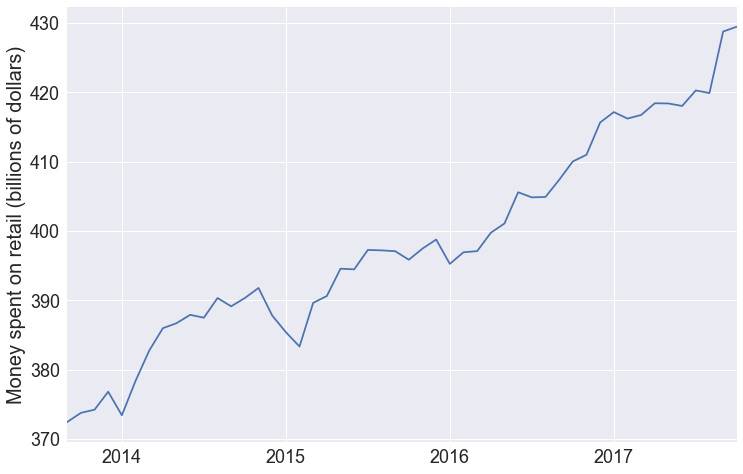

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
dd = pd.read_html('https://ycharts.com/indicators/retail_sales')
ds = pd.concat(dd[0:2]).drop([0])
ds['money'] = ds[1].apply(lambda x: float(x[:-1]))
ds = ds.iloc[::-1]
ds.reset_index(inplace=True)
ds.set_index(pd.date_range('2013-09-30', '2017-10-31', freq='M'), inplace=True)
ds['money'].plot(figsize=(12,8), fontsize=18);
plt.ylabel('Money spent on retail (billions of dollars)', size=20);


## Spending more than doubles in holiday season

In order to check out specific spending over the holiday season, let's zoom into 2016 and look at how much money was spent across several industries 1) over the holiday season in 2016 and 2) over the year in total. Remember that the holiday season is defined as the time from Thanksgiving until the end of the year, that is, from November 24 until December 31st, that is, approximately 10% of the days in the year (data is from the [National Retail Foundation](https://nrf.com/media/press-releases/nrf-forecasts-holiday-sales-increase-between-36-and-4-percent)).

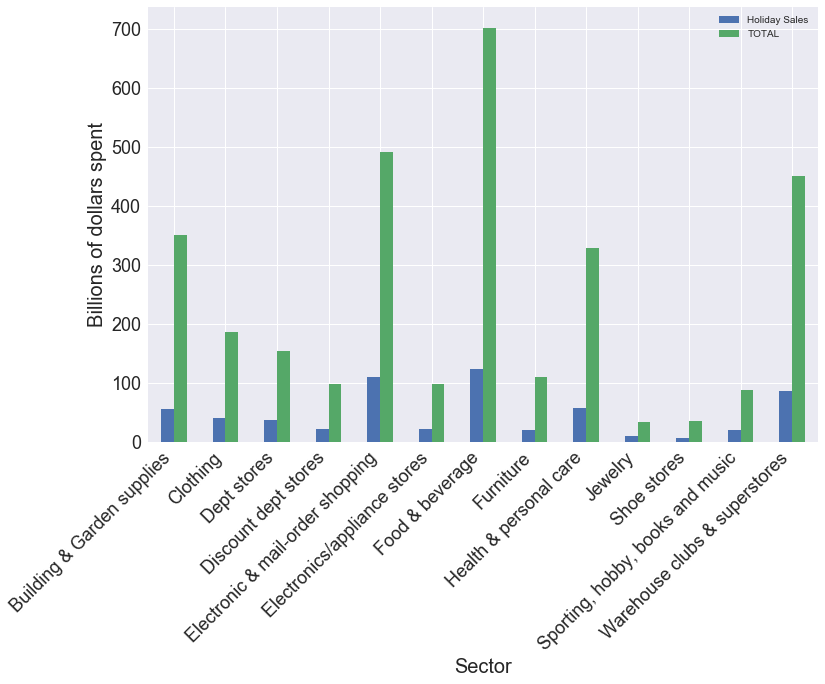

In [15]:
# data from here: https://nrf.com/media/press-releases/nrf-forecasts-holiday-sales-increase-between-36-and-4-percent
holiday_2016 = pd.read_csv('data/2016_hol.csv', sep='\t')
ax = holiday_2016.groupby(['Sector']).sum()[['Holiday Sales','TOTAL']].plot.bar( figsize=(12,8), fontsize=18);
plt.ylabel('Billions of dollars spent', size=20);
plt.xlabel('Sector', size=20);
xt = ['Building & Garden supplies', 'Clothing', 'Dept stores', 'Discount dept stores',
                       'Electronic & mail-order shopping', 'Electronics/appliance stores', 'Food & beverage',
                       'Furniture', 'Health & personal care', 'Jewelry', 'Shoe stores', 
                        'Sporting, hobby, books and music', 'Warehouse clubs & superstores']
ax.set_xticklabels(xt, rotation = 45, ha="right");


You can see that annual spending is dominated by 'Food & Beverage', 'Electronic & mail-order shopping', 'Warehouse clubs and superstores' and 'Building and garden supplies'. THe above figure also gives you an indea of the order of magnitude spent on these each year, for example, over $700 billion on 'Food & beverage'. You can also see that the amount of money spent on 'Food & beverage' over the holiday season was more than the amount spent on 'Furniture' throughout the whole of 2016, along with several other sectors.

The trillion dollar question (not quite) still remains: _how much do holiday seaon sales account for of total annual sales_? The figure below will show you across all these sectors. The black dotted line is 10%, which is the percentage of days accounted for by from Thanksgiving until the end of the year.

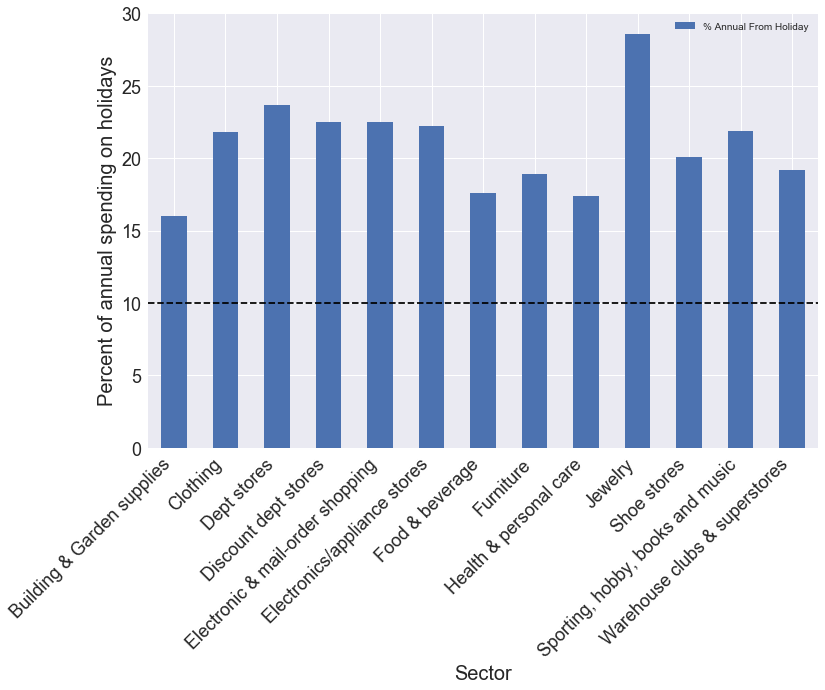

In [17]:
ax = holiday_2016.groupby(['Sector']).sum()[['% Annual From Holiday']].plot.bar( figsize=(12,8), fontsize=18);
plt.plot([-0.5, 14.5], [10, 10], "k--");
plt.xlabel('Sector', size=20);
plt.ylabel('Percent of annual spending on holidays', size=20);
ax.set_xticklabels(xt, rotation = 45, ha="right");

In 8 of 13 sectors, over 20% of annual spending occurs in the holiday season, over double the amount you would expect purely from the count of days. In all sectors, over 15% of annual spending occurs in the holiday season. 

The National Retail Federation announced [last month](https://nrf.com/media/press-releases/nrf-forecasts-holiday-sales-increase-between-36-and-4-percent) that it expects holiday retail sales in November and December – excluding automobiles, gasoline and restaurants – to increase between 3.6 and 4 percent for a total of 678.75 billion to 682 billion dollars, up from 655.8 billion last year.

## Spending over Thanksgiving weekend

You have just seen how serious holiday season spending can get.  As we're coming out of Thanksgiving weekend, let's now zoom into historical data from the NRF as to when shoppers prefer to shop over this period: Thanksgiving Data, Black Friday, Small Business Saturday or Sunday (which seems to not be named yet). Soon you'll see what happens on Cyber Monday. The figure below is from the [NRF's 2015 _Holiday Trends and Expectations Holiday Survival Kit_ ](https://nrf.com/sites/default/files/2015%20NRF%20HSK_102015_Final.pdf) (opens a pdf).

<img src="img/thanksgiving_shopping_days.png",width=600>

Black Friday is the clear winner! We're still waiting for the data to come through for 2017 and, in fact, as [fivethirtyeight reports](https://fivethirtyeight.com/features/black-friday-sales-numbers-are-useless-and-wrong/?ex_cid=story-twitter), we will need to wait some time as early estimates are notoriously wrong, but the NRF attempts to predict Thanksgiving weekend shopping each year by doing a nationwide survey. According to their survey, over a third of America said they would go shopping over the weekend.

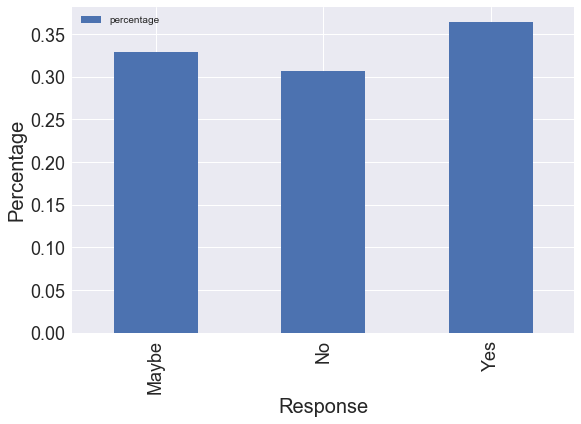

In [19]:
plan1 = pd.read_csv('data/plan_2017_1.csv').iloc[:3]
plan1.groupby(['Response']).sum().plot.bar(figsize=(9,6), fontsize=18);
plt.ylabel('Percentage', size=20);
plt.xlabel('Response', size=20);

Of those who responded that they will go shopping, 66.3% said that the deals were too good to miss out on. Of those that won't go shopping, 52.4% said that they don't enjoy the experience. Even more telling is that, of those that said they wouldn't go shopping, when asked 'What Would Convince You To Shop Over Thanksgiving Weekend either in store or online?', 46.4% said 'Nothing would change my mind about shopping over Thanksgiving weekend'.

And which days do they plan to shop on?

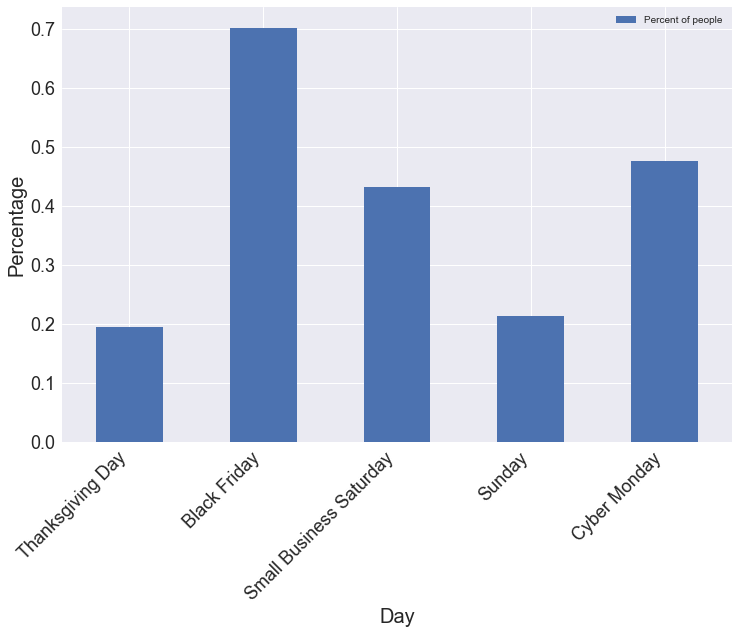

In [31]:
plan2 = pd.read_csv('data/plan_2017_3.csv')
planx = plan2.groupby(['Day']).sum().reindex(["Thanksgiving Day, November 23","Friday, November 24 (Black Friday)", 
                                      "Saturday, November 25",
                                      "Sunday, November 26",
                                      "Monday, November 27 (Cyber Monday)"])
ax = planx.plot.bar(figsize=(12,8), fontsize=18);
xt = ["Thanksgiving Day","Black Friday", "Small Business Saturday",
                                      "Sunday",
                                      "Cyber Monday"]
ax.set_xticklabels(xt, rotation = 45, ha="right");
plt.ylabel('Percentage', size=20);
plt.xlabel('Day', size=20);

Notice that the bars add up to more than 100% (they actually add up to more than 200%). This is because many people will go shopping on several days. Black Friday is the most popular, with 70% of respondees shopping then.

In [59]:
planx['Percent of people'].sum()

2.0200443000000003

## How much does American spend on Black Friday?

You've seen that Black Friday is the the most popular day for shopping across Thanksgiving Weekend. But how much do people actually spend on Black Friday? Let's delve into how much money Black Friday is actually worth (data is from [Statistics Brain](https://www.statisticbrain.com/black-friday-yearly-spending/)).

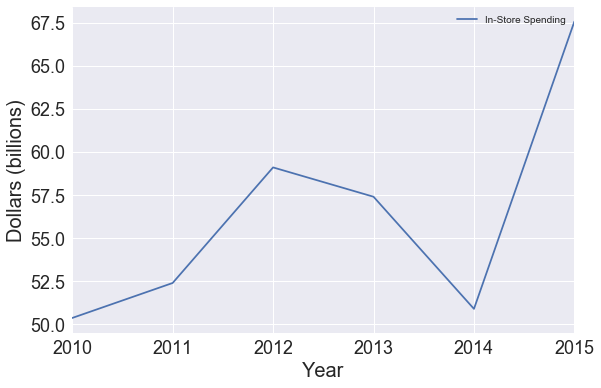

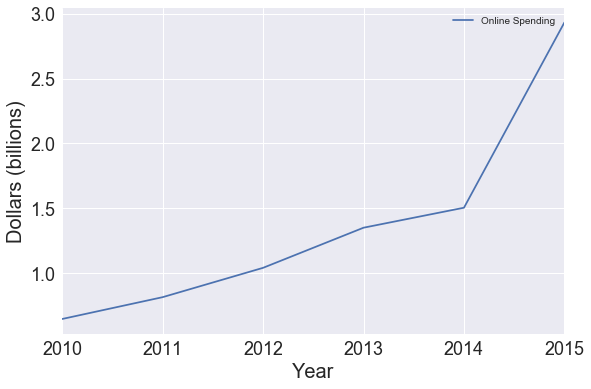

In [40]:
bf = pd.read_csv('data/bf_year.csv', sep='\t')
bf['In-Store Spending'] = bf['In-Store Spending']/(10**9)
bf['Online Spending'] = bf['Online Spending']/(10**9)
bf.groupby(['Year']).sum()[['In-Store Spending']].plot(figsize=(9,6), fontsize=18);
plt.ylabel('Dollars (billions)', size=20);
plt.xlabel('Year', size=20);
bf.groupby(['Year']).sum()[['Online Spending']].plot(figsize=(9,6), fontsize=18);
plt.ylabel('Dollars (billions)', size=20);
plt.xlabel('Year', size=20);

From the above, you can see that the amount spent instore is around 50 times more than that spent online. However, is that proportion increasing? Let's check out the percentage of Black Friday sales that were made online up until 2015:

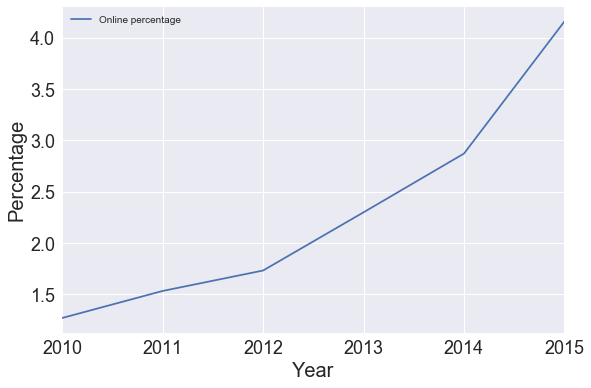

In [42]:
bf['Total Spending'] = bf['In-Store Spending'] + bf['Online Spending']
bf['Instore proportion'] = bf['In-Store Spending']/bf['Total Spending']
bf['Online percentage'] = bf['Online Spending']/bf['Total Spending']*100
bf.groupby(['Year']).sum()[['Online percentage']].plot(figsize=(9,6), fontsize=18);
plt.ylabel('Percentage', size=20);
plt.xlabel('Year', size=20);

The proportion of online sales is definitely increasing. Let's now have a look at which online retailers do the best on Black Friday: do you have any ideas?

## Which online retailers get the most unique visitors?

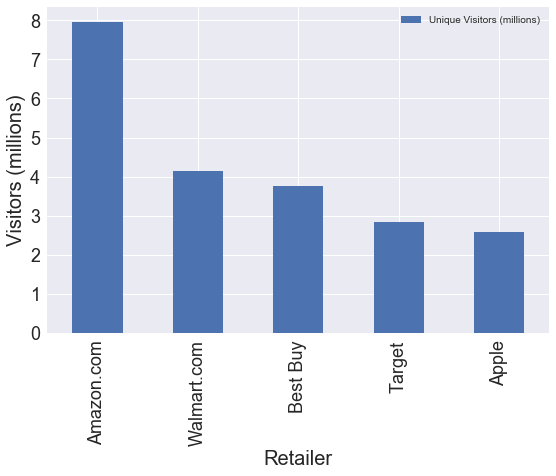

In [44]:
top_ret = pd.read_csv('data/top_vis_online_retailers.csv', sep='\t')
top_ret.groupby(['Retailer'])[['Unique Visitors (millions)']].sum().sort_values(['Unique Visitors (millions)'],
                                                                               ascending=False).plot.bar(figsize=(9,6),
                                                                                                        fontsize=18);
plt.ylabel('Visitors (millions)', size=20);
plt.xlabel('Retailer', size=20);

Amazon has around double the number of unique vistors than Walmart, which comes in at second place. Could this be beause Walmart buys more online ads than Walmart? Let's investigate this by looking at which retailers spend the most money on Black Friday on the Google Keyword _Black Friday_?

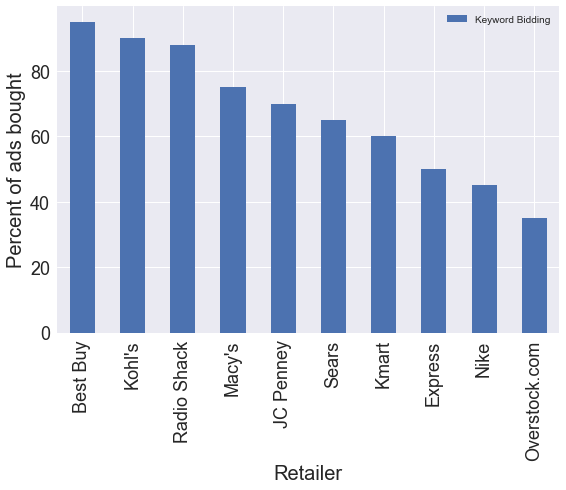

In [45]:
kb = pd.read_csv('data/keyword_bidding.csv', sep='\t').loc[:9]
kb
tt = kb.groupby(['Retailer'])[['Keyword Bidding']].sum().sort_values(['Keyword Bidding'],
                                                                               ascending=False)
tt.plot.bar(figsize=(9,6), fontsize=18);
plt.ylabel('Percent of ads bought', size=20);
plt.xlabel('Retailer', size=20);

Amazon isn't even in the top ten retailers in terms of ads bought and they still dominate the online retail market. We can't wait to check out what really went down in retail, online and instore, over Thanksgiving weekend in 2017. How much did you spend over Thanksgiving weekend, 2017?

This post was generated from a Jupyter Notebook; You can find it in [this repository](https://github.com/datacamp/datacamp-thanksgiving-spending). If you have any thoughts, responses and/or ruminations, feel free to reach out to me on twitter: [@hugobowne](https://twitter.com/hugobowne).

___